In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## DRILL: Third Attempt

So here's your task. Get rid of as much data as possible without dropping below an average of 90% accuracy in a 10-fold cross validation.

You'll want to do a few things in this process. First, dive into the data that we have and see which features are most important. This can be the raw features or the generated dummies. You may want to use PCA or correlation matrices.

Can you do it without using anything related to payment amount or outstanding principal? How do you know?

In [61]:
df = pd.read_csv('data/y2015.csv', header=0)
df = df.drop(df.columns[0], axis=1)

df = df[:-2]
#y2015.to_csv('data/y2015.csv')

In [62]:
#drop0 = [label for label in df.columns if len(df[label].unique()) >= 100]
#drop1 = ['grade', 'pymnt_plan', 'desc', 'addr_state', 'initial_list_status', 'next_pymnt_d', 'verification_status_joint'] 
#df = df.drop(drop0, axis=1)
#df = df.drop(drop1, axis=1)

In [63]:
col_nan = df.columns[np.where(df.isna().any())]
col_flt = df.columns[np.where(df.dtypes == 'float64')]
col_obt = df.columns[np.where(df.dtypes == 'object')]
col_int = df.columns[np.where(df.dtypes == 'int64')]
col_not = list(set(col_nan) & set(col_obt))
col_fnn = list(set(col_flt) & set(col_nan))

In [64]:
A = pd.Series({col : len(np.asarray(getattr(df,col).isna()).nonzero()[0].tolist()) for col in col_obt})
#B = pd.Series({col : df[col].describe()['count'] for col in col_obt})
C = pd.Series({col : df[col].describe()['unique'] for col in col_obt})
D = pd.Series({col : df[col].describe()['top'] for col in col_obt})
E = pd.Series({col : df[col].describe()['freq'] for col in col_obt})
df2 = pd.DataFrame([A,C, D, E]).T
df2.columns = ['nans', 'unique', 'top', 'freq']
df2

,nans,unique,top,freq
term,0,2,36 months,283172
int_rate,0,110,7.89%,20307
grade,0,7,C,120567
sub_grade,0,35,C1,26434
emp_title,23874,120811,Teacher,8070
emp_length,23817,11,10+ years,141520
home_ownership,0,4,MORTGAGE,207683
verification_status,0,3,Source Verified,179564
issue_d,0,12,Oct-2015,48631
loan_status,0,7,Current,287413


In [ ]:


['emp_length'] # nan ==> 0
['term','int_rate'] # re.sub non digits
b = ['sub_grade', 'emp_length', 'application_type'] #specific dict transform
c = ['home_ownership', 'loan_status', 'purpose', 'title'] #dict transform unranked
d = ['issue_d', 'last_pymnt_d', 'last_credit_pull_d'] # time
e = [ 'verification_status']# combine
f = ['open_acc_6m']# nan

drop0  = ['grade', 'emp_title', 'pymnt_plan', 'desc', 'addr_state', 'initial_list_status',
          'next_pymnt_d', 'verification_status_joint'] 

In [65]:
'term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type', 'verification_status_joint'

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type', 'verification_status_joint'],
      dtype='object')

In [55]:
len(np.where(df.verification_status_joint.isna())[0])

420582

In [58]:
np.where(df.verification_status.isna())

(array([], dtype=int64),)

In [ ]:
[for lbl in col_fnn]

In [ ]:
re.search(r'\W+', '52.7%')

In [91]:
[string for string in df.revol_util.unique().tolist() if not re.search(r'\W+', string)]

TypeError: expected string or bytes-like object

In [90]:
df.revol_util

0          29.6%
1          59.4%
2          54.3%
3          64.5%
4            46%
5          52.7%
6          46.7%
7          15.5%
8          11.6%
9          64.5%
10         56.2%
11         32.7%
12         56.3%
13         29.7%
14         19.2%
15         34.5%
16         67.2%
17         68.4%
18         40.7%
19         39.1%
20          5.7%
21         84.5%
22         63.1%
23        101.5%
24            3%
25         24.6%
26         50.3%
27         34.4%
28           72%
29         54.3%
           ...  
421063       54%
421064     46.6%
421065     92.3%
421066       98%
421067     53.1%
421068     63.4%
421069     24.9%
421070     63.3%
421071     75.6%
421072     78.9%
421073     56.9%
421074     92.4%
421075     65.1%
421076     56.8%
421077     30.6%
421078     63.2%
421079     73.4%
421080     34.7%
421081      3.2%
421082     97.6%
421083     25.8%
421084     27.1%
421085      5.6%
421086     43.9%
421087     41.6%
421088       65%
421089     69.7%
421090     82.

In [50]:
df['revol_util'].describe()['top']

'0%'

In [ ]:
count     420931
unique      1211
top           0%
freq        1256
Name: revol_util, dtype: object

In [100]:
def F(srs, arg):  
    return srs.apply(lambda x: float(re.match(r'(.*)(.+)\Z', str(x)).group(1)))

In [101]:
F(df.revol_util,[])

ValueError: could not convert string to float: 'na'

In [85]:
re.match(r'\A(.*)\W',df.revol_util[0] ).group(1)

'29.6'

In [86]:
regex_match = lambda x : re.match(r'\A(.*)\W', x).group(1)

In [88]:
df.revol_util.apply(regex_match)

TypeError: expected string or bytes-like object

In [81]:
F(df.revol_util, [])

TypeError: expected string or bytes-like object

In [25]:
df.revol_util.unique()

array(['29.6%', '59.4%', '54.3%', ..., '123.3%', '121.4%', '184.6%'],
      dtype=object)

In [23]:
A = pd.Series({col : len(np.asarray(getattr(df,col).isna()).nonzero()[0].tolist()) / len(df) * 100 for col in col_fnn})
B = pd.Series({col : len(np.asarray(getattr(df,col).unique())) for col in col_fnn})
C = pd.Series({col : np.asarray(getattr(df,col).max()) for col in col_fnn})   
D = pd.Series({col : np.asarray(getattr(df,col).min()) for col in col_fnn}) 
df1 = pd.DataFrame([A,B,C,D]).T
df1.columns = ['nans', 'unique','max', 'min']
df1

,nans,unique,max,min
open_il_12m,94.9246,13,12.0,0.0
annual_inc_joint,99.8786,309,500000.0,17950.0
il_util,95.5789,161,223.0,0.0
open_il_24m,94.9246,18,19.0,0.0
max_bal_bc,94.9246,10708,127305.0,0.0
bc_util,1.00382,1321,318.2,0.0
total_cu_tl,94.9246,34,35.0,0.0
num_rev_accts,0.000237477,92,118.0,2.0
open_rv_12m,94.9246,19,22.0,0.0
dti_joint,99.8791,450,43.86,3.0


In [ ]:
g = sns.catplot(x='loan_status', hue='mths_since_last_major_derog', kind="count",data=df, height=3, aspect=5)# col="survived"

In [18]:
df.loan_status.unique()

array(['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)',
       'In Grace Period', 'Default', 'Late (16-30 days)'], dtype=object)

In [21]:
lss = ['Fully Paid', 'Current', 'In Grace Period', 'Late (16-30 days)','Late (31-120 days)', 'Default', 'Charged Off']
{lss[i]:i for ss in lss for i in range(7)}

{'Fully Paid': 0,
 'Current': 1,
 'In Grace Period': 2,
 'Late (16-30 days)': 3,
 'Late (31-120 days)': 4,
 'Default': 5,
 'Charged Off': 6}

In [ ]:
g = sns.jointplot("total_bill", "tip", data=df, kind="reg")

In [15]:
np.percentile(x, [20,40,60,80])

array([24., 38., 52., 66.])

In [12]:
df.mths_since_last_major_derog.describe()

count    122728.000000
mean         45.114929
std          22.537803
min           0.000000
25%          27.000000
50%          45.000000
75%          63.000000
max         176.000000
Name: mths_since_last_major_derog, dtype: float64

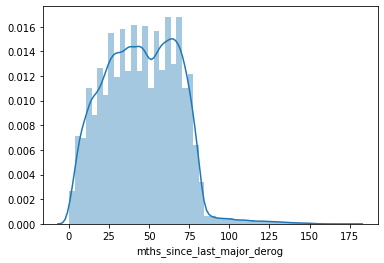

In [11]:
x = df.mths_since_last_major_derog[df.mths_since_last_major_derog.notna()]
ax = sns.distplot(x)

In [ ]:
col_nao = list(set(col_nan) & set(col_obt))
col_nao

In [ ]:
len(df.columns)

In [ ]:
lbl_dte = [label for label in df.columns if re.search(r'_d\Z', label)]
lbl_num = [label for label in df.columns if re.search(r'\Anum', label)]

#### object columns
- 'id' is unique id for each loan
- 'member_id' is unique id for person taking out loan
- 'emp_title' too many values, utility doubted
- 'pymnt_plan' has only one value
- 'url' is unique page for every loan
- 'desc' too many unique values
- 'grade' is further broken down to in sub_grade
- 'subgrade
- 'zip_code' too many unique values
- 'pymnt_plan' only one value

#### NaN columns
- 'emp_length' ==> 0, < 1 ==> 1, 1 ==> 2, .... Does no look good
- 'title' NaN ==> 0, no order, ....       Does no look good
- 'open_acc_6m' NaN ==> -1 add 1
- 'open_il_6m'  NaN ==> -1 add 1
- all _xm   NaN ==> -1 add 1
- 'inq_fi'  NaN ==> -1 add 1
- 'total_cu_tl'  NaN ==> 0 add 1
- 'mths_since_recent_inq' NaN ==> 0 add 1
- dates months from 'Dec-2014'
- 'verification_status_joint' NaN ==> verification_status

In [ ]:
df.open_acc_6m.unique()

In [ ]:
col_nan

In [ ]:
df[['verification_status_joint',, 'loan_status']][df['emp_length'].isna()]

In [ ]:
set(lbl_dte) - set(col_nan)

In [ ]:
df['loan_status'][df['last_pymnt_d'] == 'Jan-2017'].unique()

In [ ]:
df['emp_length'].unique()

In [ ]:
df[lbl_dte].head(9)

In [ ]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x='loan_status', data=dfn, hue='nan02',  ax=ax)
#ax.set(ylabel=doz['name'], xlabel=doz['xlabel'])
plt.show()

In [ ]:
col_nft = list(set(col_nan) & set(col_flt))

In [ ]:
gb = dfn.groupby('loan_status').count()

In [ ]:
dfn.loan_status.unique()

In [ ]:
dfn[['loan_status', 'mths_since_last_record', 'mths_since_last_delinq']][dfn.mths_since_last_delinq == np.nan].groupby('loan_status').count()

In [ ]:
A = pd.Series({col : len(np.asarray(getattr(dfn,col).isna()).nonzero()[0].tolist()) / len(dfn) * 100 for col in col_nft})
B = pd.Series({col : len(np.asarray(getattr(dfn,col).unique())) for col in col_nft})
C = pd.Series({col : np.asarray(getattr(dfn,col).max()) for col in col_nft})   
D = pd.Series({col : np.asarray(getattr(dfn,col).min()) for col in col_nft}) 
df1 = pd.DataFrame([A,B,C,D]).T
df1.columns = ['nans', 'unique','max', 'min']
df1

In [ ]:
df1[df1.nans <= 94].T.columns


In [ ]:
dfn[dfn.nans >= 90]

In [ ]:
len(set(cols))

In [ ]:
dfn.mths_since_last_major_derog.max()

In [ ]:
col_nan

In [ ]:
cols = []
 [np.where(getattr(dfn,col).isna()) for col in col_nan]


In [ ]:
col_drop = ['emp_title', 'pymnt_plan', 'desc', 'url','title']

In [ ]:
y2015.dtypes

In [ ]:
[(col, len(y2015[col].unique())) for col in col_obt if len(y2015[col].unique()) <= 100]

In [ ]:
y2015['emp_length'].unique()

In [ ]:
y2015['int_rate'].unique()

In [ ]:
np.where(y2015['int_rate'].isna())

In [ ]:
y2015.loc[np.where(y2015['last_pymnt_d'].isna())]['loan_status'].unique()

In [ ]:
ts = ['Jan-2017', 'Sep-2016', 'May-2016', 'Mar-2016', 'Jul-2016',
       'Jun-2016', 'Nov-2016', 'Aug-2016', 'Dec-2016', 'Oct-2016',
       'Apr-2016', 'Feb-2016', 'Jan-2016', 'Dec-2015', 'Nov-2015',
       'Oct-2015', 'Sep-2015', 'Aug-2015', 'Jul-2015', 'Jun-2015',
       'May-2015', 'Apr-2015', 'Mar-2015', 'Feb-2015', 'Jan-2015']

In [ ]:
y2015['last_pymnt_d'][list(set(np.array(y2015.index)) - set(np.where(y2015['last_pymnt_d'].isin(ts))[0]) )]

In [ ]:
np.array(y2015.index)

In [ ]:
y2015[y2015['last_pymnt_d'] == 'Jan-2017']

In [ ]:
df.issue_d.unique()

In [ ]:
S = df.issue_d
S = S.apply(lambda x: pd.Timestamp(x))
Y = S.dt.month

In [ ]:
S.max()

In [ ]:
Y = S.dt.year
M = S.dt.month

In [ ]:
R =  (Y - 2014).mul(12).add(M - 12)
R.head()

In [ ]:
R.unique()

In [ ]:
Y.head()

In [ ]:
S.tail(9)

In [ ]:
[(pd.Timestamp(ts) - pd.Timestamp('Jan-2015')).days for ts in y2015['last_pymnt_d'].unique()]

In [ ]:
convs = [('grade',     {'GFEDCBA'[i]:i for i in range(6)}),
         ('sub_grade', {[char + str(i) for char in 'GFEDCBA' for i in range(5,0,-1)][i]:i for i in range(34,-1,-1)}),
         ('verification_status', {['Not Verified', 'Verified', 'Source Verified'][i]:i for i in range(3)}),   
         ('issue_d ', {['Dec-2015', 'Nov-2015', 'Oct-2015', 'Sep-2015', 'Aug-2015','Jul-2015', 'Jun-2015', 'May-2015',
          'Apr-2015', 'Mar-2015', 'Feb-2015', 'Jan-2015'][i]:i for i in range(12)}),
        ]

In [ ]:
# ordinal rank based upon target mean
def ordinal_by_target(df, tgt, fte):
    rnk  = df.groupby(fte)[tgt].mean().sort_values(ascending=True).index
    return {rnk[i]:i for i in range(len(rnk))}
# functions to clean or tranform columns
# ordinal months min()
def A(srs, arg): 
    srs = srs.apply(lambda x: pd.Timestamp(x))
    zyr = srs.min().dt.year; zmh = srs.min().dt.month
    return (srs.dt.year - zyr).mul(12).add(srs.dt.month - zmh)
# fillna() with arg[2]
def B(srs, arg):
    assert len(arg) == 1
    return srs.f2.fillna(arg[0])
# add scalar arg[0] to series
def C(srs, arg):
    assert len(arg) == 1
    return srs.add(arg[0])
# transform using dictionary arg[0]
def D(srs, arg): 
    assert len(arg) == 1
    return srs.apply(lambda x : arg[0][x])
# convert to non ranked ordinal
def E(srs, arg): 
    dct = {srs.unique()[i]:i for i in range(len(srs.unique()))}
    return Ssrs.apply(lambda x: dct[x])
# extract by regex 1 or more digits
def F(srs, arg): 
    return srs.apply(lambda x: x.str.extract(r"\b\d+\b")



# linear scale features to approximate range -2 to 2
def B(srs, arg):  
    rng = srs.max()-srs.min()
    mid = srs.max() - rng / 2
    return srs.apply(lambda x : (x - mid) * 4 / rng)
# standardize feature with z score
def C(srs, arg):
    z_score = lambda x: (x-x.mean())/x.std()
    return srs.transform(z_score )    

# dict switch to call funtions
switch = {char:eval(char) for char in 'ABC'}
#
def switch_clean(fnn, srs, arg):
    for f in fnn:       
         srs = switch[f](srs,arg)               
    return srs

In [ ]:
# new columns 
df1['passed'] = np.where(df1.a_scre > 0, 1, 0)
df1['g_avg_'] = np.round(df1.g_tl_s.div(df1.g_tl_n), decimals = 4)
# transform columns
df1.ise_id =  df1.ise_id.add(df1.lea_id * 100)
df1.age_mh =  df1.age_mh.add(222)
# dicts to put features in rank order by target ascending
obts = {x:ordinal_by_target(df1, 'a_scre', x ) for x in a}

In [ ]:
def A(S): # strip()
    return S.apply(lambda x: x.str.strip())
def B(S): # conversion to numeric
    dct = {S.unique()[i]:i for i in range(len(S.unique()))}
    return S.apply(lambda x: dct[x])
def B(S): # cast to numeric
    return pd.to_numeric(S) 
def B(S):  # cast float to int
    return S.apply(lambda x: int(x))

def D(S): # replace all non-alpha numeric with ' '
    return S.apply(lambda x: x.str.replace(r'\W+', ' ', regex=True))
def E(S): # numeric conversion letter grade A-G 
    dct = {'GFEDCBA'[i]:i for i in range(6)}
    return S.apply(lambda x: dct[x]) 
def E(S): # numeric conversion letter grade A1-G5 
    dct = {[char + str(i) for char in 'GFEDCBA' for i in range(5,0,-1)][i]:i for i in range(34,-1,-1)}
    return S.apply(lambda x: dct[x])                   
def D(S): # replace the  '< 1' with '0' for years
    return S.apply(lambda x: x.str.replace('< 1', '0')                   
                   
def E(S): return S.apply(lambda x: x.str.replace(r'\s{2}', ' ', regex=True)) # replace 2 or more white space with 1



def B(S): return S.apply(lambda x: x.str.replace(r"\Bn't\b", ' not ', regex=True), axis=1)
def C(S): return S.apply(lambda x: x.str.replace(r'\W+', ' ', regex=True), axis=1)
def D(S): return S.apply(lambda x: x.str.replace(r'\d+', ' ', regex=True), axis=1)
def E(S): return S.apply(lambda x: x.str.lower(), axis=1) 
def F(S): return S.apply(lambda x: x.str.replace(r"\bnot\s", 'not', regex=True), axis=1)
def G(S): return S.apply(lambda x: x.str.replace(r'\s{2}', ' ', regex=True), axis=1)  
def H(S): return S.apply(lambda x: x.str.strip(), axis=1)
def I(S): return S.apply(lambda x: x.str.split(), axis=1)
def Z(S): return S
switch = {char:eval(char) for char in 'ABCDEFGHI'}

def switch_clean_column(S, funcs):
    for fun in funcs:
        S = switch[fun](S)              
    return S 
                   

In [ ]:
dicts = [{k:v} for k,v in vks]
for dct in dicts:
    switch_clean_column(getattr(df, dct['col']), dct['funcs'])
    
    


In [ ]:
['dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', ]# to int

In [ ]:
def B(S):  # cast float to int
    return S.apply(lambda x: int(x))



In [ ]:
['emp_title', 'pymnt_plan', 'desc', 'url']# drop
['A']
['BC']['term', ]
['BD']['int_rate', ]
['']['issue_d', 'purpose', 'title']
['emp_length'] # unique cleaning
['dti']# floats

In [ ]:
y2015.total_acc.unique()

In [ ]:
len(y2015.delinq_2yrs.unique())

In [ ]:
y2015.columns

In [ ]:
y2015.dtypes

## The Blind Approach

Now, as we've seen before, creating a model is the easy part. Let's try just using everything we've got and throwing it without much thought into a Random Forest. SKLearn requires the independent variables to be be numeric, and all we want is dummy variables so let's use `get_dummies` from Pandas to generate a dummy variable for every categorical column and see what happens off of this kind of naive approach.

Did your kernel die? My kernel died.

Guess it isn't always going to be that easy...

Can you think of what went wrong?

(You're going to have to reset your kernel and reload the column, BUT DON'T RUN THE MODEL AGAIN OR YOU'LL CRASH THE KERNEL AGAIN!)

## Data Cleaning

Well, `get_dummies` can be a very memory intensive thing, particularly if data are typed poorly. We got a warning about that earlier. Mixed data types get converted to objects, and that could create huge problems. Our dataset is about 400,000 rows. If there's a bad type there its going to see 400,000 distinct values and try to create dummies for all of them. That's bad. Lets look at all our categorical variables and see how many distinct counts there are...

In [ ]:
floats = y2015.select_dtypes(include=['float'])
len(floats)

In [ ]:
y2015.apply()

In [ ]:
np.where(y2015.total_pymnt.astype(str) == 0)

In [ ]:
np.where(y2015.dti.astype(str).str.split(pat='.')[1] == '0')

In [ ]:
len(np.where(y2015.dti.astype(str).str.split(pat='.', expand=True)[1] == '0')[0]) 

In [ ]:
categorical = y2015.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

Well that right there is what's called a problem. Some of these have over a hundred thousand distinct types. Lets drop the ones with over 30 unique values, converting to numeric where it makes sense. In doing this there's a lot of code that gets written to just see if the numeric conversion makes sense. It's a manual process that we'll abstract away and just include the conversion.

You could extract numeric features from the dates, but here we'll just drop them. There's a lot of data, it shouldn't be a huge problem.

In [ ]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

Wonder what was causing the dtype error on the id column, which _should_ have all been integers? Let's look at the end of the file.

In [ ]:
# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]

Now this should be better. Let's try again.

It finally works! We had to sacrifice sub grade, state address and description, but that's fine. If you want to include them you could run the dummies independently and then append them back to the dataframe.

## Second Attempt

Now let's try this model again.

We're also going to drop NA columns, rather than impute, because our data is rich enough that we can probably get away with it.

This model may take a few minutes to run.

In [ ]:
np.where(y2015.id.dtype == 'float64')

In [ ]:
y2015.apply(lambda x: x.isnull().any(), axis=1)

In [ ]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

The score cross validation reports is the accuracy of the tree. Here we're about 98% accurate.

That works pretty well, but there are a few potential problems. Firstly, we didn't really do much in the way of feature selection or model refinement. As such there are a lot of features in there that we don't really need. Some of them are actually quite impressively useless.

There's also some variance in the scores. The fact that one gave us only 93% accuracy while others gave higher than 98 is concerning. This variance could be corrected by increasing the number of estimators. That will make it take even longer to run, however, and it is already quite slow.

In [ ]:
# Your code here.

